# CS413 Image and Video Analysis -- Lab 6

## Department of Computer Science, University of Warwick
## August, 2019

## Aims:

The aims of this lab are to 

+ Learn about image features: colour histograms, Harris corners, Histogram of Orientations (HOG) and SIFT
+ Perform colour histogram feature extraction on an image classification database
+ Understand how to assess the discriminative power of a feature set
+ Learn how to visualise features using dimensionality reduction (Principal Component Analysis)
+ Implement the Harris corner detector from first principles
+ Use Scale Invariant Feature Transform (SIFT) features built into OpenCV to match features between images
+ Learn how to do fast nearest-neighbour matching using OpenCV

## Features

Features in images are usually some local characteristic of an image, such as colour and shape,
which allows us to distinguish, track and match images or parts of images. 

Colour features can be the distribution of colours in an image or region, and these can be calculated using a
histogram. 

Shape features are calculated locally by finding locations of corners and associating with them some
descriptor related to the changes in shape around the point, usually by taking a
histogram of orientations or gradients. This type of descriptor can be calculated from outputs of 
directional fitlers such as Sobel filter. 

Other types of features are texture features. We investigate look at texture features in another lab.

## COIL Image Classification images

We will run some of our experiements on the COIL-100 database of images, which is a database of
images of 100 different everyday objects on black backgrounds. It is useful as it relatively
small in size and we can quickly test out the effectiveness of different image features on them.



In [1]:
import os
import numpy as np
import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Loading COIL data and image labels

Each of there are mutiple examples of each COIL image type. We will load all the images and
keep a corresponding list of which class (label) the image is in `classes`.


In [2]:
num_classes = 100

data_dir = '/modules/cs413/data/coil-100/' # location of coli-100 data

images = []
classes = []

num_images_per_class = 10 # restrict to these many images per class
for label in range(num_classes):

    # e.g. obj10_1.png is image 1 and has label 10
    filenames = glob.glob(data_dir + 'obj' + str(label+1) + '_*.png')
    
    for j in range(len(filenames)):
        
        im = plt.imread(filenames[j])
        
        images.append(im)
        classes.append(label+1)
        
        # limit to 10 images per example
        if (j==num_images_per_class-1):
            break
        

    

class 1


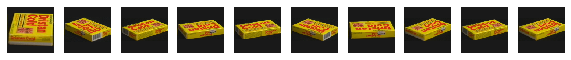

class 2


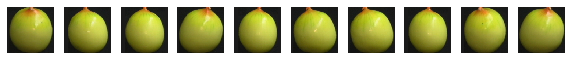

class 3


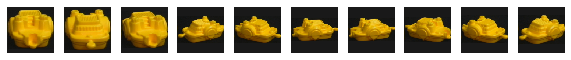

class 4


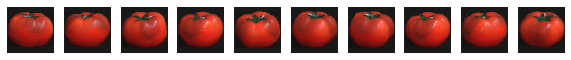

class 5


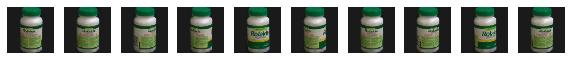

class 6


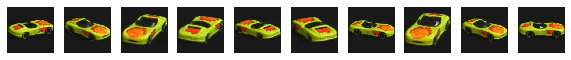

class 7


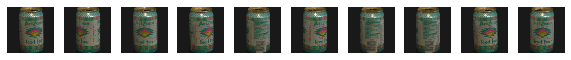

class 8


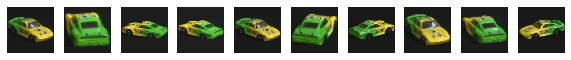

class 9


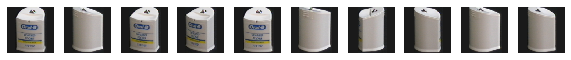

class 10


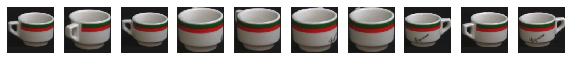

In [3]:
# This loop will show 10 images of each type

for c in range(0,10):
    
    print('class ' + str(c+1))
    fig = plt.figure(figsize=(10,10))

    j = 0
    for i in range(len(images)):

        if (classes[i]==(c+1)):

            plt.subplot(10,10,j+1)
            plt.imshow(images[i])
            plt.axis('off')
            j = j+1


    plt.show()

## Colour Histogram Features

An obvious way to differentiate each image of a given class is to measure
how much of each colour is present. We can do this using a colour histogram.

Each image is in RGB colour space and we can transform it to HSV (Hue, Saturation, Value) space
and do a histogram of the Hue (colour).

Here is how to make a HSV histogram with 25 bins.

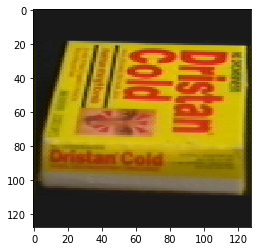

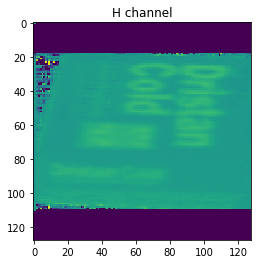

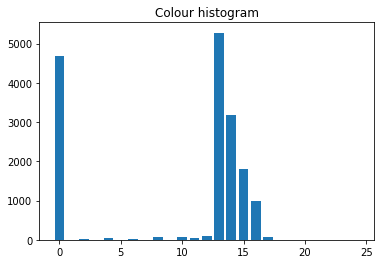

In [4]:
import cv2

hsv = cv2.cvtColor(images[0], cv2.COLOR_BGR2HSV)

plt.imshow(images[0])
plt.show()

plt.imshow(hsv[:,:,0]) # channel 0 is the H or Hue channel
plt.title('H channel')
plt.show()

hsv_hist, bin_edges = np.histogram(hsv[:,:,0], bins=25)

plt.bar(np.arange(hsv_hist.shape[0]), hsv_hist)
plt.title('Colour histogram')
plt.show()

### Exercise 1

1. Write a loop to go through all the COIL images in the list `images` and 
generate a HSV feature histogram with 25 bins. Put these into a new
list called `features`

Note: As we are not interested in the background colour, zero the value of
    the first bin of all the features. 
    
2. Confirm that two images of the same class have similar histograms. For example,
plot the histograms `features[0]`, `features[1]` and the pair `features[10+0]`, `features[10+1]`

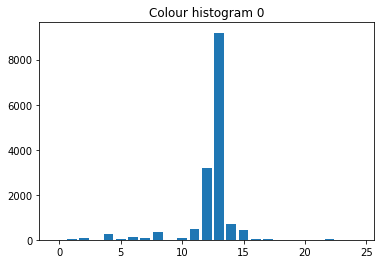

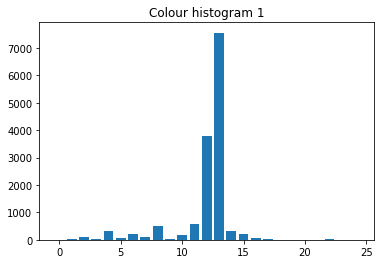

In [5]:
features = []
for i in images:
    hsv = cv2.cvtColor(i, cv2.COLOR_BGR2HSV)
    hsv_hist, bin_edges = np.histogram(hsv[:,:,0], bins=25)
    hsv_hist[0] = 0
    features.append(hsv_hist)
plt.bar(np.arange(features[10].shape[0]), features[10])
plt.title('Colour histogram 0')
plt.show()
plt.bar(np.arange(features[11].shape[0]), features[11])
plt.title('Colour histogram 1')
plt.show()

### Comparing features

Features are vectors of numbers and it is not always easy to compare them for similarity 
by just looking at plots of them. 

We can compare features by using a vector distance measure: the simplest is mean squared error (MSE).
    
The MSE betweet two vectors is simply the mean of the square of the element-wise differences: 
    Given two vectors $ \mathbf{a} = (a_1, a_2, ..., a_n) $ and $ \mathbf{b} = (b_1, b_2, ..., b_n)$
$$
    MSE(\mathbf{a}, \mathbf{b}) = \frac{1}{n} \sum_i (a_i - b_i)^2
$$    

Other useful distance measures are the cosine distance, which is the angle between the two vectors:
$$
    CD(\mathbf{a}, \mathbf{b}) = \arccos\left[ \frac{\mathbf{a}.\mathbf{b}}{|\mathbf{a}| |\mathbf{b}|} \right]
$$

### How good are the features?

If our colour features are any good at discriminating the images, we should find that the within-class
MSE values are much smaller than the between-class MSE values.

In other words, any two features of the same image class should have a small MSE between them (because
they are similar) and any two 
features from different class should have a large error (because they are different).

We can plot histograms of the within and between class MSEs. Here's how:

### Exercise 2

1. Run the code in below which uses the function `mse` to caculate and plot the within and between
class errors. What conclusions can you draw from the histograms?

2. Implement the cosine-distance distance and repeat the analysis. Is cosine distance any
better at separating the classes?

Hint: You might want to use the numpy functions `numpy.linalg.norm()` to get the norm (length) of a 
vector, `numpy.dot()` to take the dot product of two vectors and `numpy.arccos()` to get the inverse
cosine.

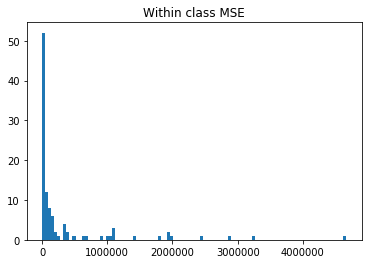

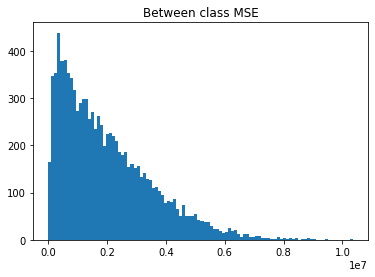

/local/java/python-pip-packages.cs413/lib64/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
/local/java/python-pip-packages.cs413/lib64/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/local/java/python-pip-packages.cs413/lib64/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


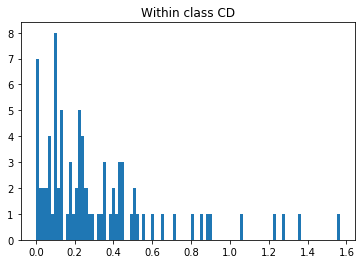

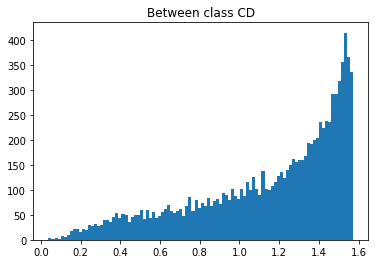

In [6]:
# find intra and inter errors
def mse(x, y):
    return np.mean(np.square(x-y))

def cd(a,b):
    return np.arccos((np.dot(a,b))/(np.linalg.norm(a)*np.linalg.norm(b)))

within = []
between = []
n = len(features)
for k in range(10000):
    
    i = np.random.randint(0,n-1)
    j = np.random.randint(0,n-1)
    
    if (classes[i]==classes[j]):
        within.append(mse(features[i], features[j]))
    else:
        between.append(mse(features[i], features[j]))

plt.hist(np.array(within), bins=100)
plt.title('Within class MSE')
plt.show()
plt.hist(np.array(between), bins=100)
plt.title('Between class MSE')
plt.show()

within = []
between = []
n = len(features)
for k in range(10000):
    
    i = np.random.randint(0,n-1)
    j = np.random.randint(0,n-1)
    
    if (classes[i]==classes[j]):
        within.append(cd(features[i], features[j]))
    else:
        between.append(cd(features[i], features[j]))

plt.hist(np.array(within), bins=100)
plt.title('Within class CD')
plt.show()
plt.hist(np.array(between), bins=100)
plt.title('Between class CD')
plt.show()

### Nearest-neighbour search

We can use the feature distance measure to find implement a nearest-neighbour search. 

Given a *query* image, we can try and list a rank-ordered list of the closest K-neighbours to that
image based on pair-wise features distances.

Here is a function which takes a list of images and corresponding features,
a `query_index` and returns the `K` nearest images in feature distance (using MSE).


### Exercise 3

1. Write a for loop to plot the 10 closest images to each of the first 5 COIL-100 images using 
the MSE colour feature distances. Title each of the ranked images with the returned distance
using `plt.title(str(closest_distance[k]))`.  

To help you, I've defined a `k_nearest_neighbours` function. You can call it like this:

~~~~
    # calculate distance from image of class i to all others
    closest_images, closest_distances = k_nearest_neighbours(images, features, i)
    
    # closest_images is a list of closest image indexes
    # closets_distances is a list of MSE feature distances to the query image
~~~~

2. What can you conclude about colour as a feature?


In [7]:
def k_nearest_neighbours(images, features, query_index, K=10):
    
    # calculate distance from image of class i to all others
    distances = []
    for i in range(0,len(features)):
        if (i!=query_index): # exclude itself
            distances.append(mse(features[query_index], features[i]))
            
    # sort by increasing distance and get the indices where these are
    indices = np.argsort(distances)
    
    closest_images = [images[k] for k in indices]
    closest_distances = [distances[k] for k in indices]

    # return K closest only
    return closest_images[:K], closest_distances[:K]



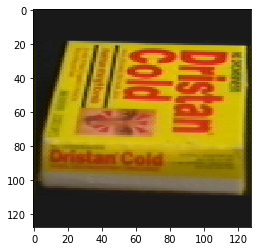

base image


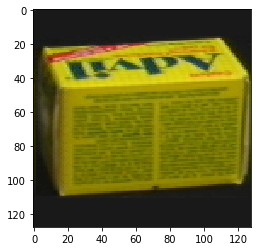

190893.32


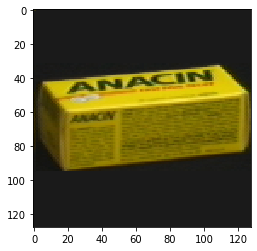

214387.0


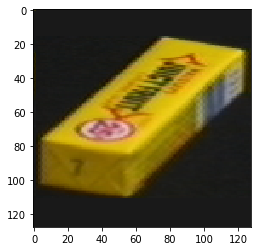

220902.48


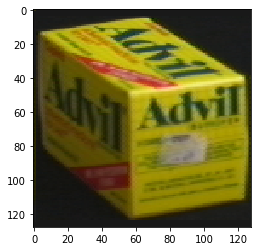

265014.48


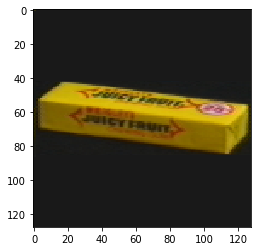

265834.48


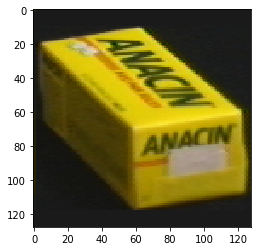

272509.88


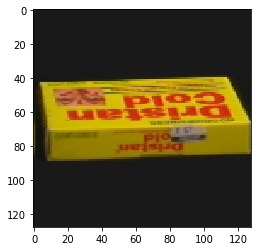

275877.52


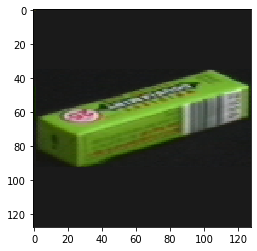

303081.28


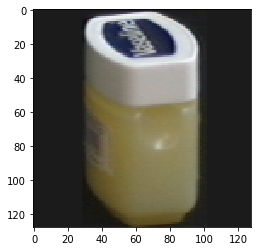

304147.44


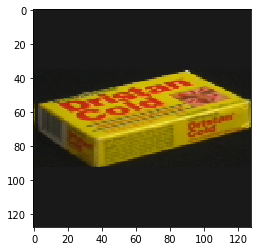

310066.32


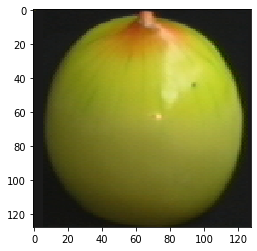

base image


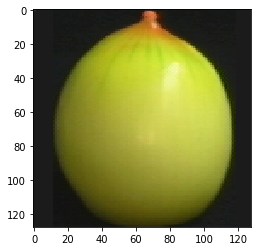

69911.2


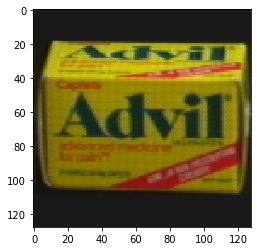

79144.32


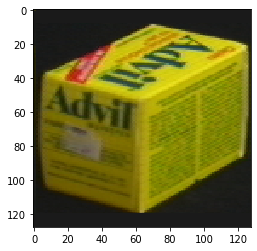

88606.64


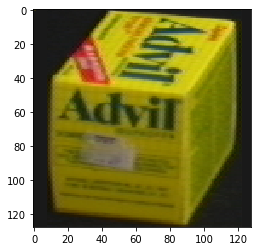

101834.16


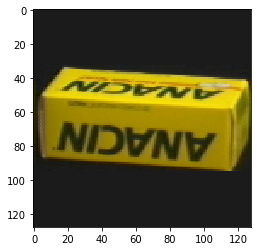

124834.68


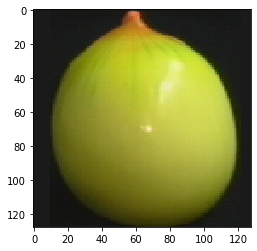

128642.52


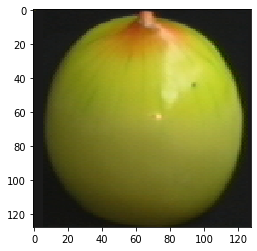

132244.76


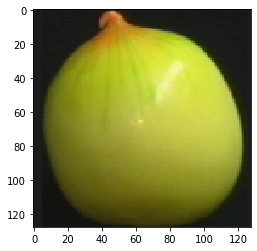

133971.72


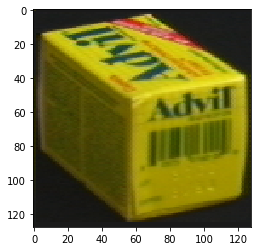

193866.96


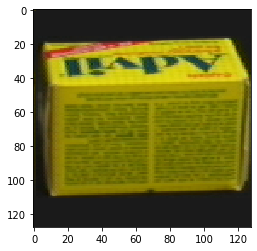

194872.56


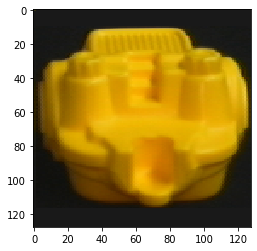

base image


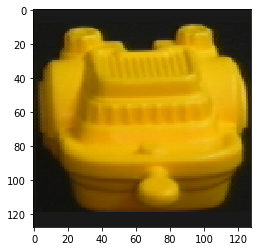

10132.88


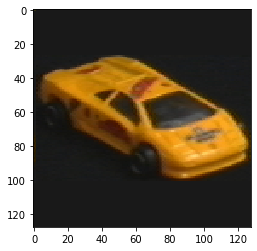

73425.52


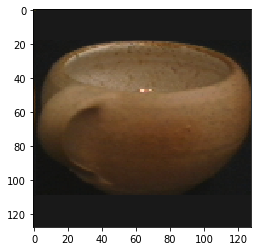

106020.76


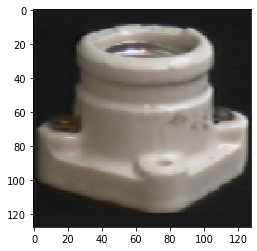

146888.8


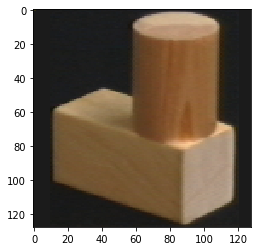

167282.52


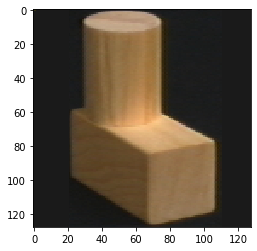

177108.76


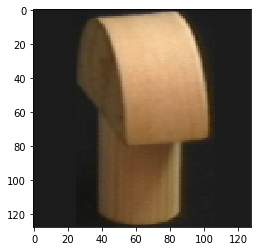

192309.48


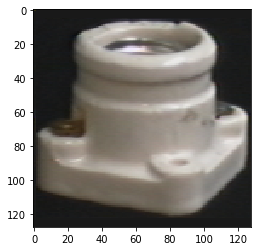

192816.48


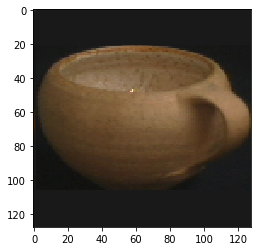

206861.4


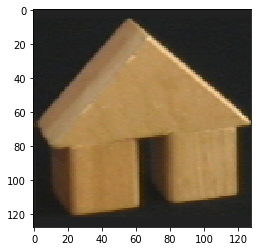

227691.24


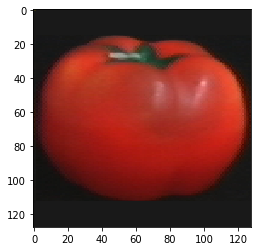

base image


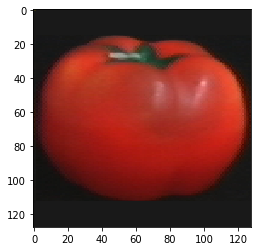

2166.72


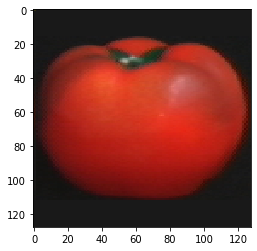

2464.56


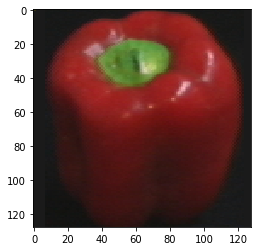

32881.88


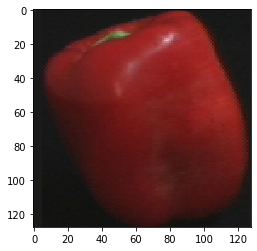

51275.2


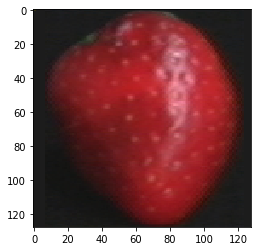

53152.28


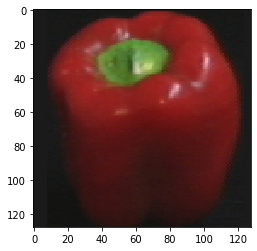

62756.24


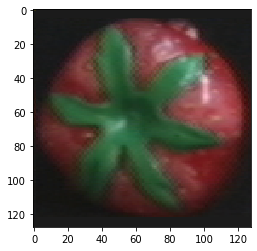

65592.36


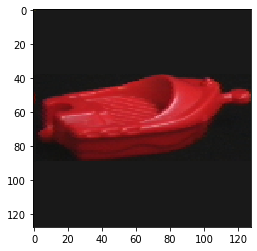

67091.72


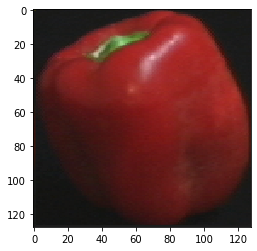

71733.64


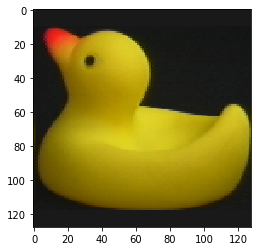

77636.84


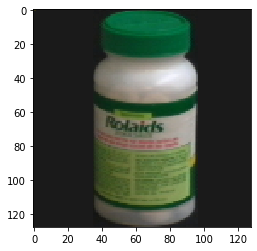

base image


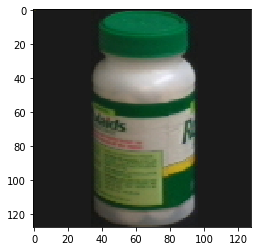

2395.84


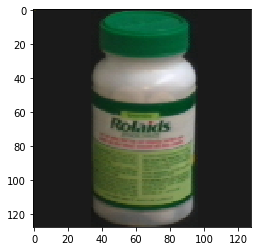

6706.8


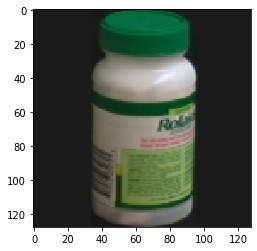

8517.44


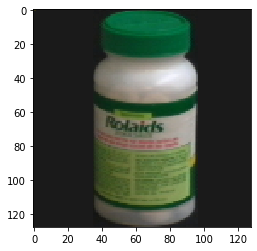

9407.68


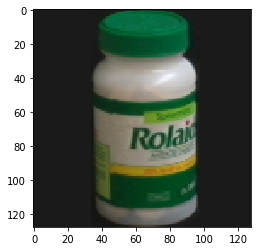

10269.72


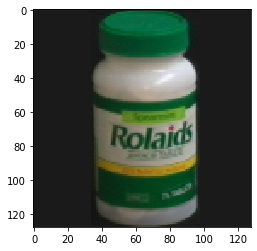

15282.84


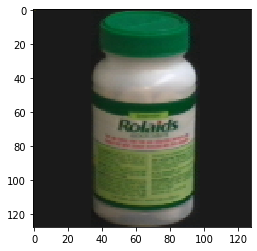

32391.16


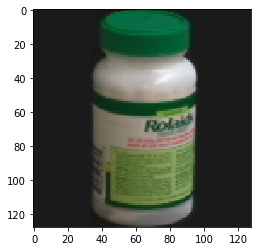

74901.52


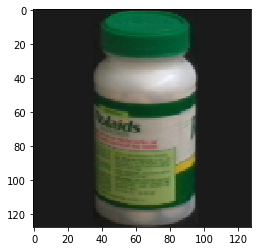

81582.32


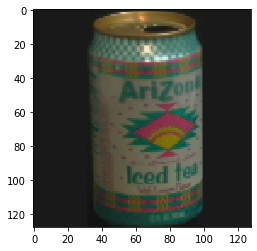

97504.08


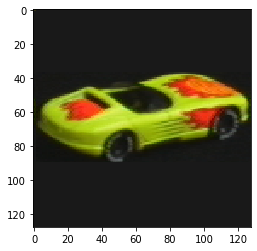

base image


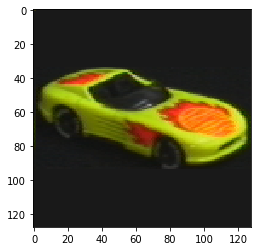

7579.28


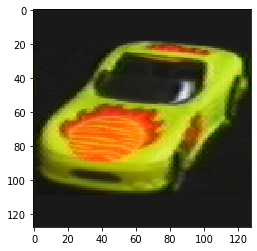

13645.44


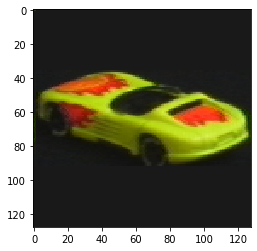

35421.28


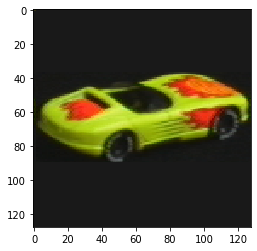

41116.88


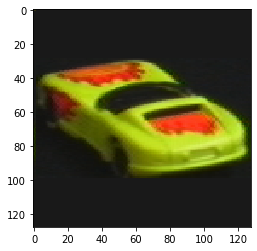

52065.0


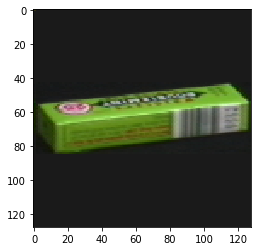

67970.6


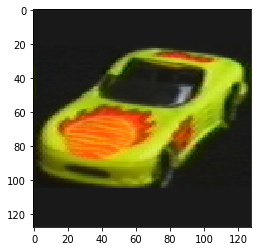

90650.28


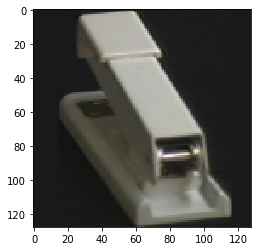

91629.68


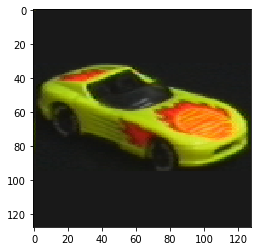

106407.0


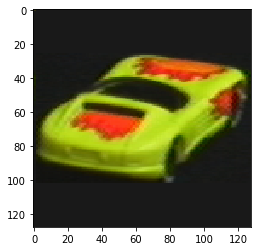

157202.68


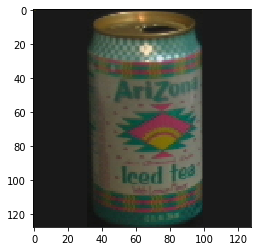

base image


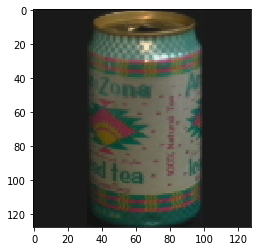

4293.88


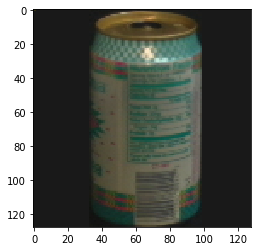

4926.56


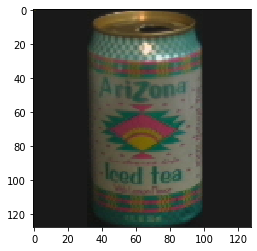

5274.72


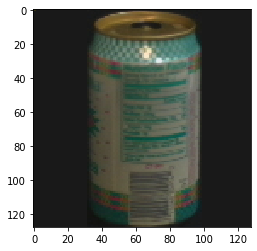

5822.36


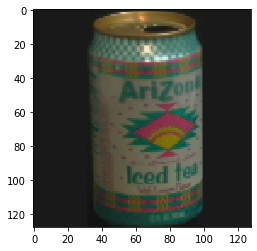

13988.28


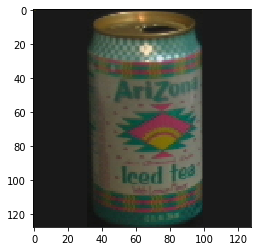

14151.08


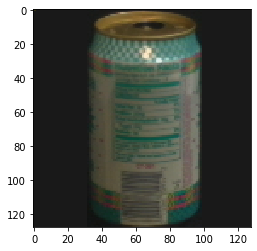

19398.88


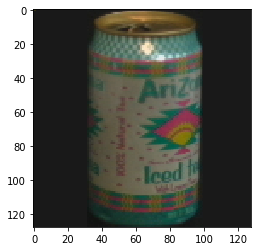

23678.88


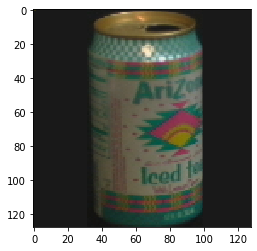

23786.88


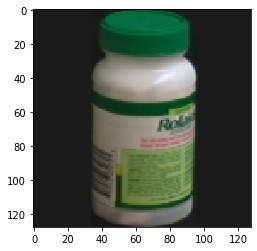

76540.96


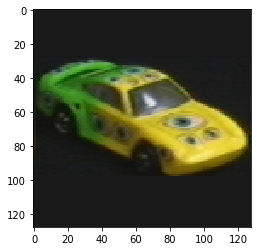

base image


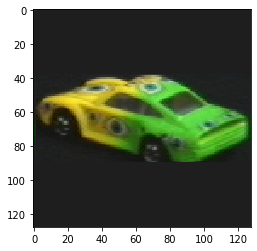

7414.2


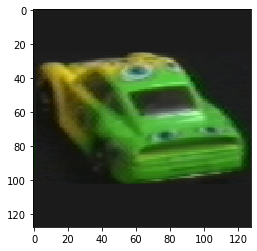

52486.88


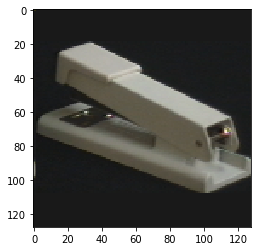

61737.56


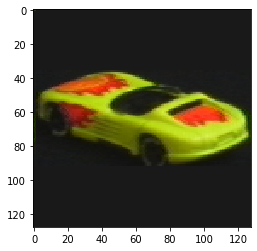

63093.32


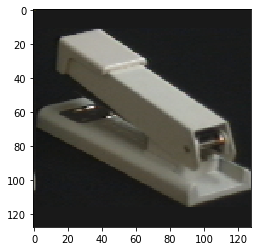

67878.64


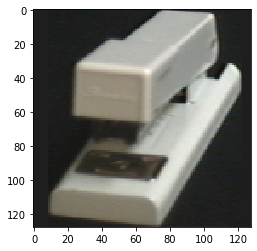

68207.84


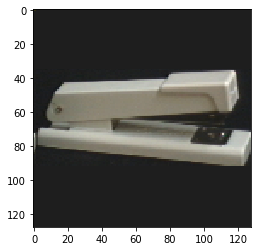

73229.84


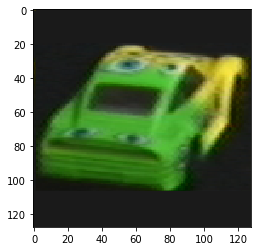

85764.2


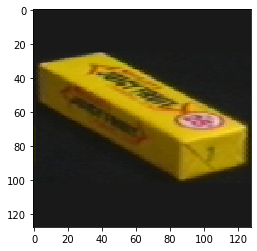

87966.92


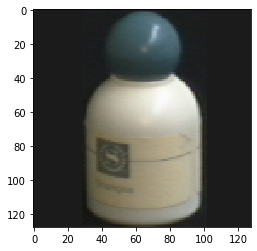

101523.0


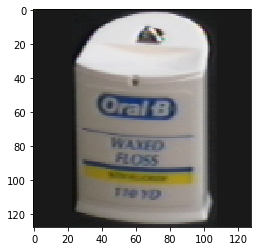

base image


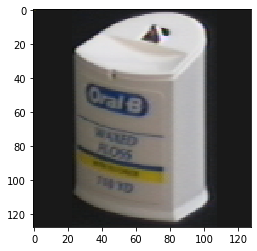

3311.88


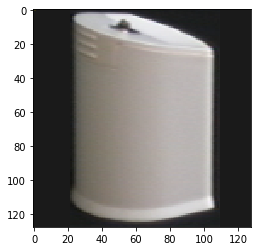

12016.88


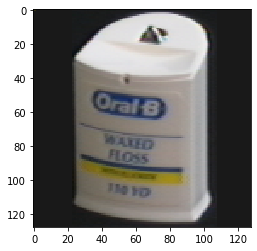

25799.56


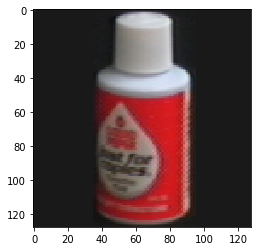

43090.8


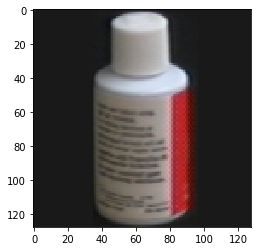

43969.6


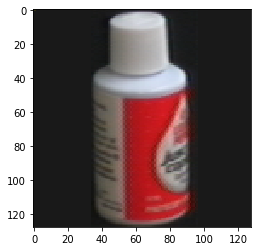

48773.04


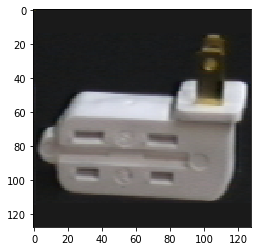

52405.68


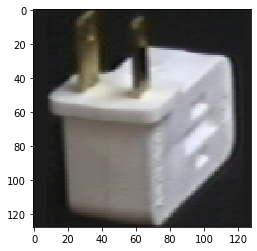

53172.32


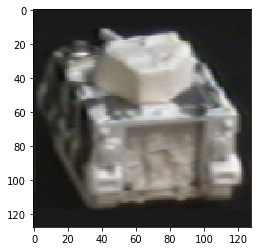

55141.0


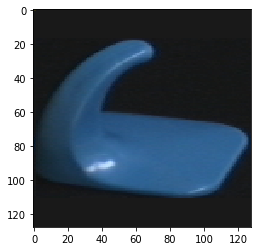

59189.76


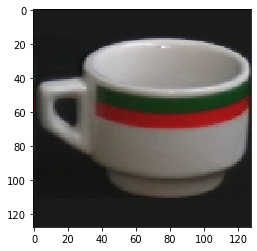

base image


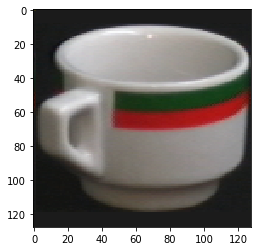

920.88


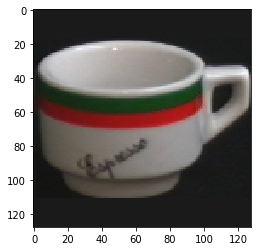

3816.68


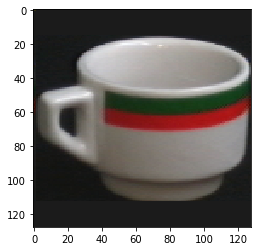

8730.84


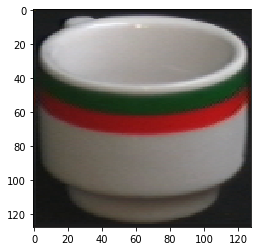

12995.0


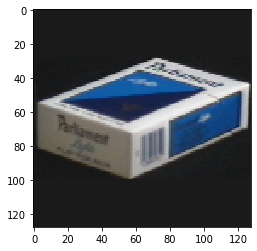

31272.08


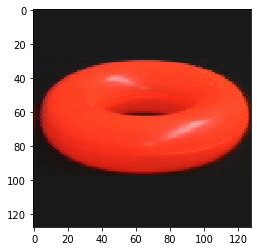

36513.44


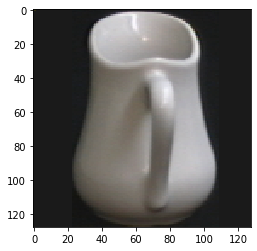

37432.0


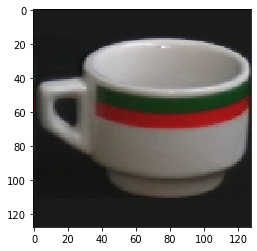

42859.84


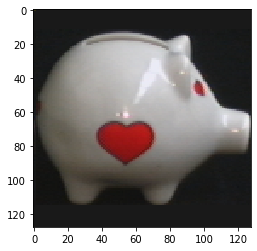

43354.04


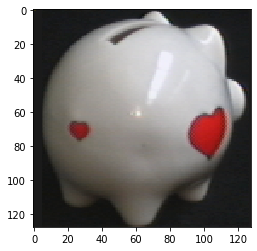

43656.56


In [8]:
# try query image against 10 closest images from for first 10 classes
for i in range(0,100,10):
    
    # calculate distance from image of class i to all others
    closest_images, closest_distances = k_nearest_neighbours(images, features, i)
    plt.imshow(images[i])
    plt.show()
    print("base image")
    # display closest images and their distances
    for x in range(len(closest_images)):
        plt.imshow(closest_images[x])
        plt.show()
        print(closest_distances[x])
    # ...fill in rest
    

## Dimensionality reduction using Princpal Component Analysis

If we want to visualise whether a feature is good we can attempt to plot the feature
in an appropriate *sub-space* (usually of dimensionality 2 or 3).

To do this we might Principal Component Analysis (PCA) to find the sub-space basis vectors.

PCA is linear method which takes data of arbitrary dimensionality (usually very large) and
finds an ordered set of basis vectors (the princpal components or directions), in which
the data has the greatest variation. 

The PCA method caculates the *covariance* matrix of the data (by subtracting the mean and taking outer products).
It then uses eigen value/eigen vector decomposition to order the components (the eigen vectors) by 
their eigen value, from largest to smallest. Finally, we project the input data samples on
to 1 or more of the components to reduce the dimensionality of the data.

PCA is easy enough to implement in Python from scratch, but `scikit-learn` has library functions which we can 
use. 

### Exercise 4

1. Run the following PCA code and work out what it is doing. 

2. Are the results what you were expecting? What can you conclude about the discriminative power
of the colour features?

3. Repeat the decomposition but using 10 dimensions. Then plot, make three further scatter plots of: dimension 2 against 
    dimension 3; dimension 4 against dimension 5 and dimension 6 against dimension 7. 
    
    How can you interpret the results?
    
    

X shape is  (1000, 25)
Extracting the top  10
Projecting the input data on the subspace basis vectors 
y has shape  (1000, 10)


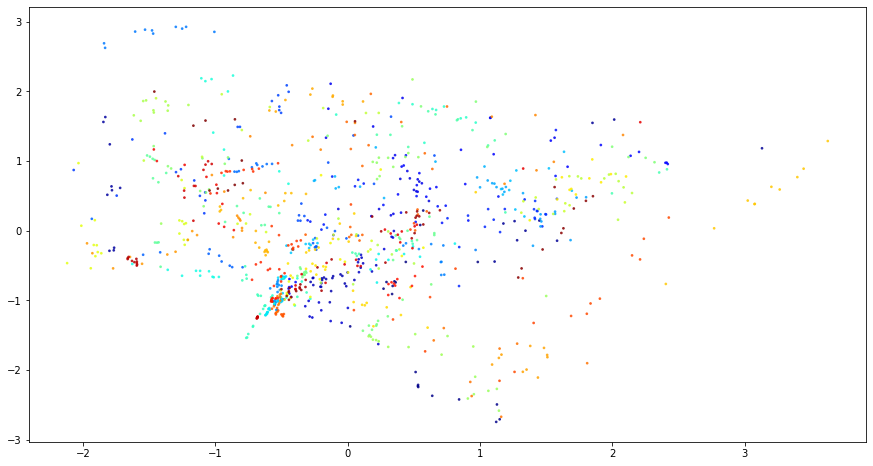

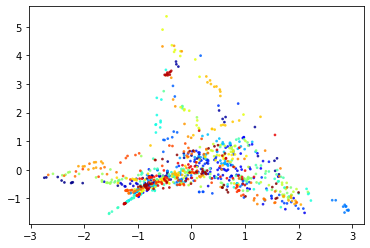

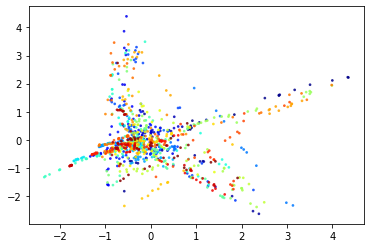

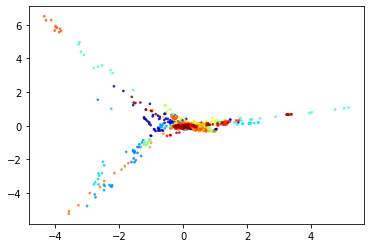

In [9]:
# do pca and then plot sub space in 2D
from sklearn.decomposition import PCA

X = np.array(features) # do it on our colour features
print('X shape is ', X.shape)

n_components = 10 # how many sub components we want

print('Extracting the top ', n_components)
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X)

print('Projecting the input data on the subspace basis vectors ')
y = pca.transform(X) # these are 2D coordinates

print('y has shape ', y.shape)

# plot a scatter of the data with a different colour for each class

fig = plt.figure(figsize=(15,8))
plt.scatter(y[:,0], y[:,1], s=3, c=np.array(classes)[:], cmap='jet', alpha=0.75)
plt.show()

plt.scatter(y[:,1], y[:,2], s=3, c=np.array(classes)[:], cmap='jet', alpha=0.75)
plt.show()

plt.scatter(y[:,3], y[:,4], s=3, c=np.array(classes)[:], cmap='jet', alpha=0.75)
plt.show()

plt.scatter(y[:,5], y[:,6], s=3, c=np.array(classes)[:], cmap='jet', alpha=0.75)
plt.show()

## Harris Corner Features

Colour features can be useful for whole images, but they are illumination dependent and often
the shape of an object is a better desciminating feature. 

Edges are good features for object boundaries, but they can change based on pose of the object,
and like colour, can vary with illumination.  

More reliable shape features for object recognition and tracking are coners: points where two or
    more edge meet.

The Harris corner detector is simple to implement and works well for many task at finding
a set of invariant *key-points* in a given image. 

Given an image, Harris calculates corners in small window where the eigen values of 
mean Hessian of the first derivatives are both large.  Remember, the Hessian
is just the outer product of the pixel gradient direction (the image x and y gradients).

It turns out that we don't actually need the eigen-values as the corner *likelihood* (how
much a pixel is a corner) can
be estimated using the formula:
$$
    R = \det(H) - k \, \text{trace}(H)
$$
where the $H$ is the Hessian of the local image derivatives:
$$
    H = \left( \begin{array}{cc} \sum I_x^2 & \sum I_x I_y\\ \sum I_x I_y & \sum I_y^2 \end{array} \right)
$$


###  Exercise 5

1. Test the `harris` function below on the Lego `alien.png` image. Plot the output of the function
for `window_size = 7` and `k = 0.04`.  

2. To locate the corners precisely, we need to find the local maxima of the Harris output. 

Note: There is a very nice way to do this in Python with `skimage.feature.peak_locak_max`. Given `corner_prob` as the Harris output, we can try:
~~~~
from skimage.feature import peak_local_max
xy = peak_local_max(corner_prob, min_distance=3,threshold_abs=0.1)

print(xy.shape)
fig = plt.figure(figsize=(6,12))

plt.imshow(alien_im, cmap='gray') # source image
plt.scatter(xy[:,1], xy[:,0], color='r') # corner points overlay
plt.show()
~~~~

3. Test the `harris` method for different values of `window_size` and the paramter `k`.


In [10]:
from scipy import signal

def harris(I, window_size, k=0.04):

    dx_kernel = np.array([[-1.0, 1.0], [-1.0, 1.0]])
    dy_kernel = np.array([[-1.0, -1.0], [1.0, 1.0]])
    
    I_f = I # 
    
    # calculate dI/dx, dI/dy, dI/dt by convolutions
    I_x = signal.convolve2d(I_f, dx_kernel, boundary='symm', mode='same')
    I_y = signal.convolve2d(I_f, dy_kernel, boundary='symm', mode='same')
    
    hw = window_size//2
    
    corner_prob = np.zeros(I.shape, dtype='float')
    for i in range(hw, I.shape[0]-hw-1):
        for j in range(hw, I.shape[1]-hw-1):
            
            # local derivatives in x, y and t
            I_xw = I_x[i-hw:i+hw+1, j-hw:j+hw+1].ravel()
            I_yw = I_y[i-hw:i+hw+1, j-hw:j+hw+1].ravel()
            #print('I_tw has shape ', I_tw.shape)

            A = np.vstack((I_xw, I_yw)) # get A here
            
            #print(A.shape)
            M = np.matmul(A, A.T)
            
            #print(M.shape)
            trace = M[0,0] + M[1,1]
            det = M[0,0]*M[1,1]-M[0,1]*M[1,0]
            
            R = det - k * trace*trace
            corner_prob[i,j] = R

    return corner_prob

(300, 209)


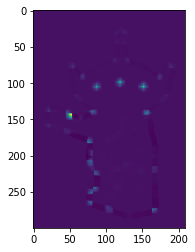

In [11]:
data_dir = '/modules/cs413/data/'
im = plt.imread(data_dir + 'alien.png')

print(im.shape)

corner_prob = harris(im, 8, k=0.04)
plt.imshow(corner_prob)
plt.show()

(55, 2)


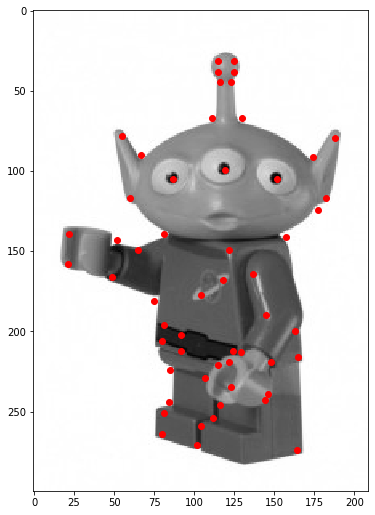

In [12]:
from skimage.feature import peak_local_max
xy = peak_local_max(corner_prob, min_distance=3,threshold_abs=0.1)

print(xy.shape)
fig = plt.figure(figsize=(6,12))

plt.imshow(im, cmap='gray') # source image
plt.scatter(xy[:,1], xy[:,0], color='r') # corner points overlay
plt.show()

## Feature Descriptors using SIFT

The Harris method is good for locating corners, but it does not actually make features i.e. it does
not extract *descriptors* at the corners.

We might just take the colour histogram in a region around a corner. A better method is to 
take a histogram of orientations (HoG). 

The Scale Invariant Feature Transform (SIFT) is a combined key-point and HoG extractor which is implemented
in OpenCV. 

We will experiment with it next to see what is does and its effectiveness. 

(Note that to run the following you will need to have installed the additional OpenCV library `opencv-contrib-python`)


### Detecting and displaying SIFT features using OpenCV

To detect SIFT key-points, you need to 

1. Initialise a SIFT detector object
~~~~
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
~~~~

2. Use the `detect()` method:
    
~~~~
kp = sift.detect(img, None) # run detect on image img
~~~~

3. Each key point has the following fields associated with it
~~~~

    .pt  # pt[0], pt[1] are the location of the keypoint
    .angle # the angle the SIFT corner
    .response # the magnitude of the response at the coner
    .size # the scale/size of the SIFT corner
~~~~

4. To display the keypoints on the original image, OpenCV provides a useful function

~~~~
img_with_keypoints = cv2.drawKeypoints(img, kp, outImage=np.array([]), color=(0, 0, 255))


fig = plt.figure(figsize=(7,10)) # plot on image
plt.imshow(img_with_keypoints)
plt.show()
~~~~

### Exercise 6

1. Run the SIFT keypoint detector on the `wolf-hall-1.png` image. 

2. Print out the location angle and response for the first 10 keypoints, e.g. you can use the 
statement:
~~~~
print('key point ', i, ' is at ', np.round(kp[i].pt,1), ' and has angle ', 
          np.round(kp[i].angle), ' response ', np.round(kp[i].response,3))
~~~~

3. Run the SIFT keypoint detector on the `wolf-hall-2.png` image. How many of the keypoints 
correspond?



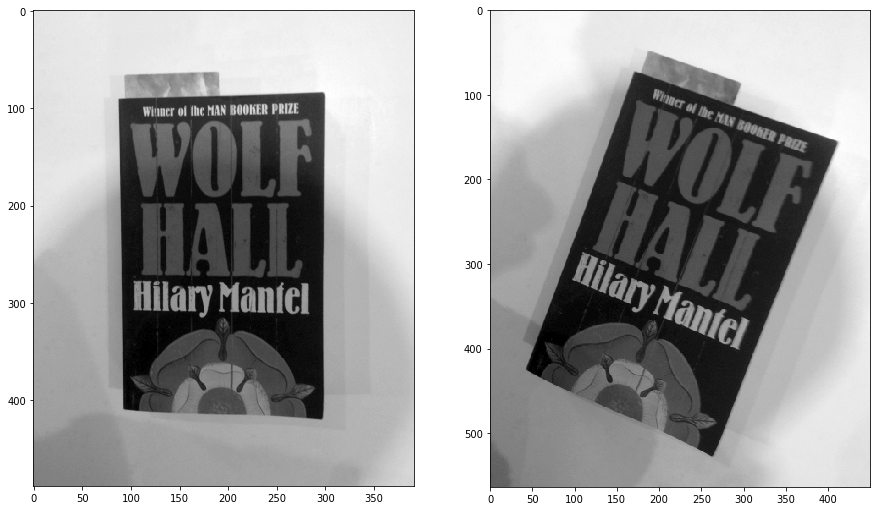

In [13]:
# SIFT and matching using OpenCV

import numpy as np
import cv2 
import matplotlib.pyplot as plt

img1 = cv2.imread(data_dir + 'books/wolf-hall-1.png', cv2.IMREAD_GRAYSCALE) 
img2 = cv2.imread(data_dir + 'books/wolf-hall-2.png', cv2.IMREAD_GRAYSCALE) 

fig = plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.show()

key point  0  is at  [ 61.6 159.5]  and has angle  190.0  response  0.034
key point  1  is at  [ 86.1 394.6]  and has angle  176.0  response  0.033
key point  2  is at  [92.  88.4]  and has angle  257.0  response  0.032
key point  3  is at  [97.5 70.4]  and has angle  257.0  response  0.022
key point  4  is at  [ 99.3 103.2]  and has angle  185.0  response  0.057
key point  5  is at  [101.1 265.5]  and has angle  179.0  response  0.042
key point  6  is at  [101.6  86.9]  and has angle  264.0  response  0.025
key point  7  is at  [103.  189.2]  and has angle  189.0  response  0.039
key point  8  is at  [105.6 382.2]  and has angle  327.0  response  0.021
key point  9  is at  [106.  408.7]  and has angle  93.0  response  0.039


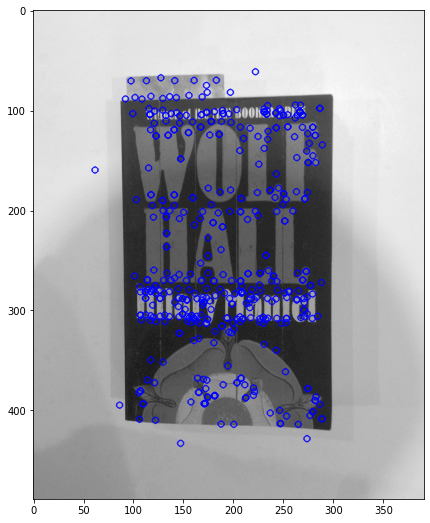

In [16]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

kp, des1 = sift.detectAndCompute(img1,None)

for i in range(10):
    print('key point ', i, ' is at ', np.round(kp[i].pt,1), ' and has angle ', 
          np.round(kp[i].angle), ' response ', np.round(kp[i].response,3))
    
img_with_keypoints = cv2.drawKeypoints(img1, kp, outImage=np.array([]), color=(0, 0, 255))

fig = plt.figure(figsize=(7,10))
plt.imshow(img_with_keypoints)
plt.show()

key point  0  is at  [ 44.  402.4]  and has angle  197.0  response  0.028
key point  1  is at  [ 45.3 335.2]  and has angle  209.0  response  0.03
key point  2  is at  [ 56.  418.8]  and has angle  191.0  response  0.048
key point  3  is at  [ 57.5 429.8]  and has angle  115.0  response  0.033
key point  4  is at  [ 59.1 367.7]  and has angle  204.0  response  0.024
key point  5  is at  [ 59.9 444.7]  and has angle  110.0  response  0.02
key point  6  is at  [ 65. 369.]  and has angle  201.0  response  0.022
key point  7  is at  [ 68.1 414.7]  and has angle  45.0  response  0.015
key point  8  is at  [ 68.1 414.7]  and has angle  332.0  response  0.015
key point  9  is at  [ 68.4 401.1]  and has angle  347.0  response  0.017


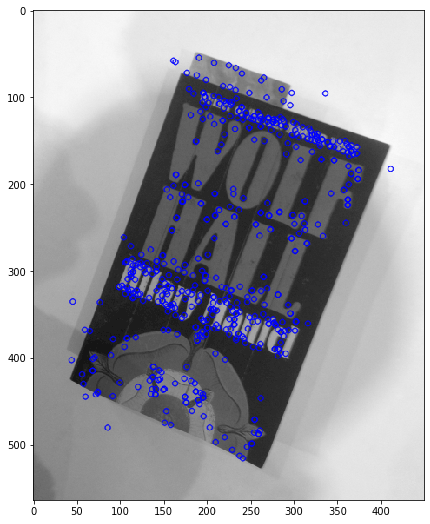

In [17]:
sift = cv2.xfeatures2d.SIFT_create()

kp2, des2 = sift.detectAndCompute(img2,None)

for i in range(10):
    print('key point ', i, ' is at ', np.round(kp2[i].pt,1), ' and has angle ', 
          np.round(kp2[i].angle), ' response ', np.round(kp2[i].response,3))
    
img2_with_keypoints = cv2.drawKeypoints(img2, kp2, outImage=np.array([]), color=(0, 0, 255))

fig = plt.figure(figsize=(7,10))
plt.imshow(img2_with_keypoints)
plt.show()

## SIFT feature descriptors and nearest-neighbour matching

SIFT also calculates descriptors at each key-point which are by default 128 dimensional histograms of
orientation. 

### Key-points and Descriptors

To detect key-point and calculate descriptors, we need to use the `detectAndCompute()` function with
the SIFT object.

~~~~
# find the keypoints and descriptors with SIFT

kp, des = sift.detectAndCompute(img,None)

~~~~

### Plotting descriptors

The descriptors are returned as an N x 128 dimensional array, with each row being a descriptor
for the Nth key-point.

We can plot the descriptors:
    
~~~~

print(des1.shape)

plt.plot(des[0,:]) # plot first keypoint descriptor
plt.show()
~~~~

### Nearest-neighbour matching

We can use a distance measure between descriptors to locate a pair of matched key-points. 

For example given two sets of descriptor arrays for images 1 and 2 `des1` and `des2` we can 
caculate the MSE distances by:
~~~~
    d = sklearn.metrics.mean_squared_error(des1[i,:], des2[j,:]) # feature distance between key points i and j
~~~~

### Displaying matches: OpenCV `DMatch` class and  `drawMatchesKnn()`

OpenCV provides a little object, `DMatch` which can store the indexes of the two keypoints and the 
distance, so we can make it like this
~~~~
    match = cv.DMatch(i, j, d)
~~~~

It is used by the OpenCV helper display functions `cv2.drawMatchesKnn()` to overlay the 
lines between matching pairs of keypoints, given two images. This method makes a display image, e.g.

~~~~
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,120,0),
                   flags = cv2.DrawMatchesFlags_DEFAULT)

# calculate some matches
matches = []
for k in range(10):
    i = np.random.randint(0, des1.shape[0])
    matches.append(get_match(i, des1, des2)) # store matches

# make an image of the matching pairs of keypoints
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3)
plt.show()
~~~~

Note that the `get_match` method must return a tuple of `DMatch` objects for the nearest and the next-nearest from 
keypoint `i` on the first image. We can write the `get_match()` function like this:

~~~~
def get_match(i, des1, des2):

    distances = []
    for j in range(des1.shape[0]): # find a match between des1[i] and des2[j]
        d = sklearn.metrics.mean_squared_error(des1[i,:], des2[j,:])
        distances.append(d)
        
    indices = np.argsort(distances) # sort in increasing distance   
    
    closest_index = indices[0]
    next_closest = indices[1]
    
    pair = (cv2.DMatch(i, closest_index, distances[closest_index]),
            cv2.DMatch(i, next_closest, distances[next_closest]))
    return pair

~~~~




### Exercise 7

1. Calculate keypoints and descriptors for the two images `wolf-hall-1.png` and `wolf-hall-2.png`.

2. Define the `get_match` function and then make an image of matches from 10 random keypoints on the first
image to corresponding nearest and next-nearest keypoints on the second image. Hint: All the code you need
is given above!

3. Print out the distance values of the matchest returned from `get_match`. What is the ratio of distances
between the first and second matching nearest-neighbour? 

4. In Lowe's 1999 paper, he suggest a match pruning strategy to remove false matches which test to
compare the two distances and only keep the match if the first distance was less than 0.7 of the second.

It can be implemented like this:
~~~~
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        
draw_params = dict(#matchColor = (0,255,0),
                   singlePointColor = (255,120,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
~~~~
which adds a `matchesMask` to the `draw_params` used by `drawMatchesKnn`.  

Use this to prune out false matches. Do you agree with the remaining matches?



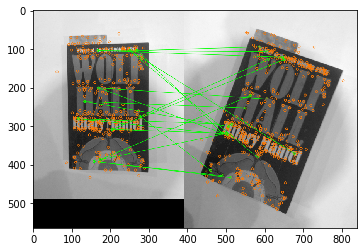

In [40]:
"""import sklearn
def get_match(i, des1, des2):

    distances = []
    for j in range(des1.shape[0]): # find a match between des1[i] and des2[j]
        d = sklearn.metrics.mean_squared_error(des1[i,:], des2[j,:])
        distances.append(d)

    indices = np.argsort(distances) # sort in increasing distance   

    closest_index = indices[0]
    next_closest = indices[1]

    pair = (cv2.DMatch(i, closest_index, distances[closest_index]),
            cv2.DMatch(i, next_closest, distances[next_closest]))
    return pair

matches=[]
for x in range(10):
    j = np.random.randint(0,len(des1))
    print(get_match(j,des1,des2)[0].distance,"||", get_match(j,des1,des2)[1].distance, \
          "||", get_match(j,des1,des2)[0].distance/get_match(j,des1,des2)[1].distance)
    print()
    matches.append(get_match(j,des1,des2))
matchesMask = []    
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask.append([1,0])

    draw_params = dict(#matchColor = (0,255,0),
                   singlePointColor = (255,120,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)

img3 = cv2.drawMatchesKnn(img1,kp,img2,kp2,matches,None,**draw_params)

plt.imshow(img3)
plt.show()
"""

####
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,120,0),
                   flags = cv2.DrawMatchesFlags_DEFAULT)

# calculate some matches
matches = []
for k in range(10):
    i = np.random.randint(0, des1.shape[0])
    matches.append(get_match(i, des1, des2)) # store matches
    
# make an image of the matching pairs of keypoints
img3 = cv2.drawMatchesKnn(img1,kp,img2,kp2,matches,None,**draw_params)

plt.imshow(img3)
plt.show()

def get_match(i, des1, des2):

    distances = []
    for j in range(des1.shape[0]): # find a match between des1[i] and des2[j]
        d = sklearn.metrics.mean_squared_error(des1[i,:], des2[j,:])
        distances.append(d)

    indices = np.argsort(distances) # sort in increasing distance   

    closest_index = indices[0]
    next_closest = indices[1]

    pair = (cv2.DMatch(i, closest_index, distances[closest_index]),
            cv2.DMatch(i, next_closest, distances[next_closest]))
    return pair

matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(#matchColor = (0,255,0),
                   singlePointColor = (255,120,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT) 

## A Fast K-nearest neighbour matches

A problem with the brute-force approach is that it is an $O(N^2)$ method and can be very slow if the
numbers of feature keypoints is large. 

OpenCV has an efficient implementation of a KNN matches which uses KD-Trees. It can find the closest
and next-closest match pairs for a specified distance function:
    
~~~~
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params) # make FLANN searcher

matches = flann.knnMatch(des1,des2,k=2) # find matches!

~~~~

### Exercise 8

1. Use the FLANN based matcher and display the matches using `drawMatchesKnn` for two images from the
`books` directory. 

2. Use the FLANN matcher with and without the Lowe ratio test.

3. How would you score the resulting matches to say if an image of the source item (the query item) is present in the target image?

In [31]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params) # make FLANN searcher

matches = flann.knnMatch(des1,des2,k=2) # find matches!
print(matches)

[[<DMatch 0x7f1cabad04b0>, <DMatch 0x7f1cabad0710>], [<DMatch 0x7f1caec31ab0>, <DMatch 0x7f1caec31ad0>], [<DMatch 0x7f1caec31a90>, <DMatch 0x7f1caec319d0>], [<DMatch 0x7f1caec31c90>, <DMatch 0x7f1caec31c50>], [<DMatch 0x7f1caec31a50>, <DMatch 0x7f1cb82be1b0>], [<DMatch 0x7f1cb82be6b0>, <DMatch 0x7f1cb82be710>], [<DMatch 0x7f1cb82be270>, <DMatch 0x7f1cb82be410>], [<DMatch 0x7f1cb82be770>, <DMatch 0x7f1cb82be290>], [<DMatch 0x7f1cb82be2b0>, <DMatch 0x7f1cb82be350>], [<DMatch 0x7f1cb82be730>, <DMatch 0x7f1cb82be150>], [<DMatch 0x7f1cb82be310>, <DMatch 0x7f1cb82be510>], [<DMatch 0x7f1cb82be6d0>, <DMatch 0x7f1cb82be650>], [<DMatch 0x7f1cb82be450>, <DMatch 0x7f1cb82be3d0>], [<DMatch 0x7f1cb82be3b0>, <DMatch 0x7f1cb82be390>], [<DMatch 0x7f1cb82be3f0>, <DMatch 0x7f1cb82be1f0>], [<DMatch 0x7f1cb82be250>, <DMatch 0x7f1cb82be330>], [<DMatch 0x7f1cb82be230>, <DMatch 0x7f1ccebab910>], [<DMatch 0x7f1cb9b34430>, <DMatch 0x7f1cb9b34450>], [<DMatch 0x7f1cb9b342d0>, <DMatch 0x7f1cb9b34670>], [<DMatch 0x

## Optical Flow Estimation

Below is some code to track features in a sequences using OpenCV's optical flow implementaiton.

The code first finds 100 features on the first frame using `cv2.goodFeaturesToTrack()` in a 7 x 7 regions. 

Then it uses a Lucas-Kande type optical flow calculation (over a pyramid) to find the motion of these features and 
draw lines (between them).

I've modified the code to allow you to reset which features are tracked every `num_frames` frame.

### Exercise 9

Test out this code with different sequences and investigate what happens with different numbers of initial features, and altering the parameters for both the feature detector and the optical flow method.

In [ ]:
import cv2
import numpy as np
cap = cv2.VideoCapture('/modules/cs413/data/roundabout.mp4') # try your own sequence here

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# parameters for Lucas Kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# create some random colors
color = np.random.randint(0,255,(100,3))

# take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

# number of frames before resetting with new features
num_frames = 60

count = 0
while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Take first frame and find corners in it
    if (count%num_frames==0):
        old_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

        mask = np.zeros_like(old_frame)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
    
    count += 1

cv2.destroyAllWindows()
cap.release()